In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve

% matplotlib inline

pd.options.display.max_columns = 999
df_s = pd.read_csv("energy_data_variables_final_normalized.csv", usecols = ['DOLLAREL', 'DRYRUSEM', 'USEWASHM', 'TOTROOMS', 'LGTOUTNUM', 'BEDROOMS', 'DRYRFUEL', 'TOTSQFT_EN', 'NUMCFAN', 'TVCOLOR', 'WINDOWS', 'NCOMBATH', 'LGTINNUM', 'ELWATER', 'FUELH2O', 'OTHROOMS', 'WHEATAGE', 'NUMFRIG', 'NHSLDMEM', 'AGERFRI2', 'LOCRFRI2', 'FUELHEAT', 'THERMAINAC', 'NUMFREEZ', 'KWH_M'])

In [2]:
# Check Shape of DataFrame
df_s.shape

(5686, 25)

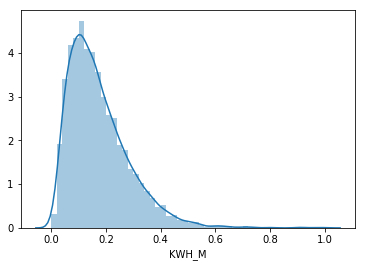

In [3]:
# Check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

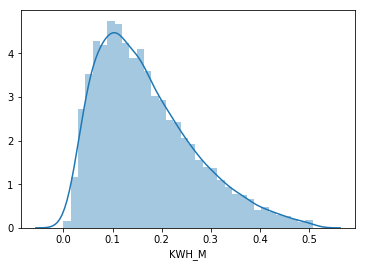

In [4]:
# Remove outliers that are more than 3 standard deviations from the mean 
df_s = df_s[np.abs(df_s["KWH_M"]-df_s["KWH_M"].mean())<=(3*df_s["KWH_M"].std())]

# Re-check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

In [5]:
# Re-check the DataFrame's shape 
df_s.shape

(5618, 25)

In [6]:
# Set X, Y Variables

X = df_s.values[:, 0:24]
Y = df_s.values[:, 24]

In [7]:
# Calculate RMSE 
ols = LinearRegression()
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = cross_val_score(ols, X, Y, cv=shuffle, scoring = "neg_mean_squared_error")
mse_scores1 = -mse_scores 
rmse_scores = np.sqrt(mse_scores1)

print ("The RMSE scores are %s" 
       % (rmse_scores))
print ("The mean of the RMSE scores is %f" 
       %(rmse_scores.mean()))

The RMSE scores are [0.04061582 0.03933612 0.04729503 0.03999648 0.0430751  0.04129601
 0.04103062 0.04018117 0.0444721  0.04008289]
The mean of the RMSE scores is 0.041738


In [8]:
# Calculate MAE  
from sklearn.metrics import mean_absolute_error

ols = LinearRegression()
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
mae_scores = cross_val_score(ols, X, Y, cv=shuffle, scoring = "neg_mean_absolute_error")
mae_scores_ = -mae_scores

print ("The mean absolute error scores are %s" 
       % (mae_scores_))
print ("The mean of the mean absolute error scores is %f" 
       %(mae_scores_.mean()))

The mean absolute error scores are [0.02919909 0.02856282 0.03151976 0.02950147 0.02973705 0.02961032
 0.02884976 0.02861093 0.03168191 0.02814004]
The mean of the mean absolute error scores is 0.029541


In [9]:
# Calculate VAR

ols = LinearRegression()
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
ev_scores = cross_val_score(ols, X, Y, cv=shuffle, scoring = "explained_variance")

print ("The explained variance scores are %s" 
       % (ev_scores))
print ("The mean of the explained variance scores is %f" 
       %(ev_scores.mean()))

The explained variance scores are [0.82999408 0.85489629 0.78891105 0.82850091 0.80638666 0.80622056
 0.82005623 0.84307274 0.79993335 0.8560505 ]
The mean of the explained variance scores is 0.823402


In [10]:
# Calculate R2 
from sklearn.metrics import mean_absolute_error

ols = LinearRegression()
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
r_scores = cross_val_score(ols, X, Y, cv=shuffle, scoring = "r2")

print ("The R2 scores are %s" 
       % (r_scores))
print ("The mean of the R2 scores is %f" 
       %(r_scores.mean()))

The R2 scores are [0.8297363  0.85450498 0.7888853  0.82849204 0.80623894 0.80617127
 0.81969163 0.84278633 0.79980648 0.85604691]
The mean of the R2 scores is 0.823236


Text(0.5,1,'Ordinary Least Squares Regression')

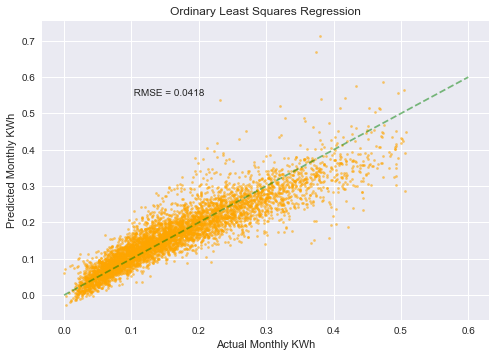

In [13]:
# Plot the Predict vs. Actual Values Using CrossValPredict
from sklearn.model_selection import cross_val_predict
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
predicted_ols = cross_val_predict(ols, X, Y, cv=shuffle)

%matplotlib inline
plt.style.use('seaborn')
plt.scatter(Y, predicted_ols, s = 5, color = 'orange', alpha = 0.6)
plt.plot([0,0.6], [0,0.6], "b--", color = "green", alpha = 0.5)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.text(0.1,0.55, ' RMSE = {}'.format(round(sqrt(mean_squared_error(Y, predicted_ols)), 4)))
plt.title('Ordinary Least Squares Regression')